In [1]:
from omigo_core import tsv
from omigo_core import tsvutils
from omigo_core import utils
from omigo_ext import graphviz_ext

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { height:200% !important; }</style>"))

In [22]:
vtsv = tsv.TSV("\t".join(["id", "name", "mylabel", "size"]), []) \
    .add_map_as_row({"id": "a1", "name": "A1", "mylabel": "label1", "size": "big"}) \
    .add_map_as_row({"id": "a2", "name": "A2", "mylabel": "label2", "size": "big"}) \
    .add_map_as_row({"id": "a3", "name": "A3", "mylabel": "label3", "size": "small"}) \
    .add_map_as_row({"id": "a4", "name": "A4", "mylabel": "label4", "size": "big"}) \
    .add_map_as_row({"id": "a5", "name": "A5", "mylabel": "label5", "size": "small"}) \
    .add_map_as_row({"id": "a6", "name": "A6", "mylabel": "label7", "size": "big"}) \
    .add_map_as_row({"id": "a7", "name": "A7", "mylabel": "label7", "size": "big"})

etsv = tsv.TSV("\t".join(["src", "dest", "dir"]), []) \
    .add_map_as_row({"src": "a1", "dest": "a2", "dir": "out"}) \
    .add_map_as_row({"src": "a1", "dest": "a3", "dir": "out"}) \
    .add_map_as_row({"src": "a1", "dest": "a4", "dir": "out"}) \
    .add_map_as_row({"src": "a2", "dest": "a4", "dir": "out"}) \
    .add_map_as_row({"src": "a3", "dest": "a4", "dir": "out"}) \
    .add_map_as_row({"src": "a4", "dest": "a5", "dir": "out"}) \
    .add_map_as_row({"src": "a5", "dest": "a1", "dir": "out"}) \
    .add_map_as_row({"src": "a5", "dest": "a6", "dir": "out"}) \
    .add_map_as_row({"src": "a5", "dest": "a7", "dir": "out"})

In [23]:
vtsv.show()

id	name	mylabel	size 
a1	A1  	label1 	big  
a2	A2  	label2 	big  
a3	A3  	label3 	small
a4	A4  	label4 	big  
a5	A5  	label5 	small
a6	A6  	label7 	big  
a7	A7  	label7 	big  


In [24]:
etsv.show()

src	dest	dir
a1 	a2  	out
a1 	a3  	out
a1 	a4  	out
a2 	a4  	out
a3 	a4  	out
a4 	a5  	out
a5 	a1  	out
a5 	a6  	out
a5 	a7  	out


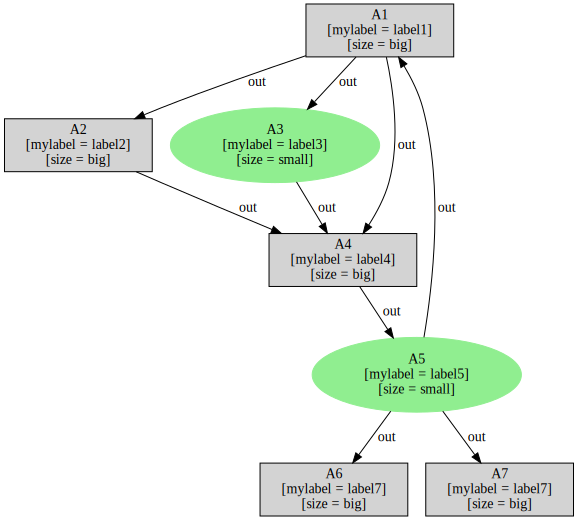

In [26]:
def custom_display_func(mp):
    props = graphviz_ext.__dot_func_default__(mp)
    if (mp["size"] == "big"):
        props["shape"] = "rectangle"
    else:
        props["shape"] = "oval"
        props["color"] = "lightgreen"
        
    return props    

graphviz_ext.plot_graph(vtsv, etsv, "id", "src", "dest", vertex_display_id_col = "name", node_props = ["id", "mylabel", "size"], edge_props = ["dir"], 
    custom_display_func = custom_display_func, create_missing_vertices = True)